# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-01 Gradient Descent Method

Chapter4에서 bias term이 추가되었기 때문에 dataset도 
$$y = ax + b$$
와 같은 식에서부터 만들어지며 이에 따라 model도
$$\hat{y} = \theta_{1}x + \theta_{0}$$
가 됩니다.

따라서 이번 PA 4-01에서는 다음의 단계들을 통해 $\hat{y} = \theta_{1}x + \theta_{0}$에 대해 gradient descent method를 적용하여 $\theta_{1}, \theta_{0}$을 학습시킵니다.

<ul>
    <li> Step.1 Dataset Preparation </li>
    <li> Step.2 One Iteration of GDM </li>
    <li> Step.3 Gradient Descent Method </li>
    <li> Step.4 Predictor Visualization </li>
</ul>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

from LR_dataset_generator import LR_dataset_generator

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Dataset Preparation

SVLR을 위한 dataset은
$$y = ax + b$$
에서부터 만들어지기 때문에 default dataset에서 coefficient를 customizing해줘야 합니다.

다음은
$$y = 2x + 1$$
에서부터 200개의 data sample을 가지는 dataset을 만드는 코드입니다.

In [29]:
n_sample = 200
coefficient_list = [1, 2]

data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_n_sample(n_sample)
data_gen.set_coefficient(coefficient_list)
dataset = data_gen.make_dataset()

print(dataset.shape)

(200, 3)


***
**Programming**  
위의 코드를 이용하여
$$y = 5x + 2$$
에서부터 1000개의 data sample을 가지는 dataset을 만드세요.

In [40]:
##### Start Your Code(Learning Preparation) #####
n_sample = 300
coefficient_list = [2, 5]

data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_n_sample(n_sample)
data_gen.set_coefficient(coefficient_list)
dataset = data_gen.make_dataset()
##### End Your Code(Learning Preparation) #####
print(dataset.shape)

(300, 3)


***
## Step.2 One Iteration of GDM

SVLR의 predictor는 다음과 같다.
$$
\hat{y} = \theta_{1}x + \theta_{0}
$$

따라서 1개의 data sample에 대한 loss는

$$ \mathcal{L}^{(i)} = (y^{(i)} - \hat{y}^{(i)})^{2} = (y^{(i)} - (\theta_{1}x^{(i)} + \theta_{0}))^{2}$$

이므로 $\mathcal{L}$은 $\theta_{1}, \theta_{0}$에 대한 함수이다.  
이때 각각 $\theta_{1}, \theta_{0}$에 대한 partial derivative를 구하면

$$
\frac {\partial \mathcal{L}^{(i)}} {\partial \theta_{1}}
= -2x^{(i)}(y^{(i)} - \hat{y}^{(i)})
$$

$$
\frac {\partial \mathcal{L}^{(i)}} {\partial \theta_{0}}
= -2(y^{(i)} - \hat{y}^{(i)})
$$

이다. 위의 partial derivative를 이용하여 GDM을 적용하면 $\theta_{1}, \theta_{0}$은 다음과 같이 update됩니다.

$$ \theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} 
= \theta_{1} + 2\alpha x^{(i)}(y^{(i)} - \hat{y}^{(i)})$$

$$ \theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} 
= \theta_{0} + 2\alpha(y^{(i)} - \hat{y}^{(i)})$$

***
**Programming**  
data sample $(x^{(i)}, y^{(i)}) = (1,12)$에 대하여 한 번의 iteration을 연산해보세요.  
이때 학습 조건은 다음과 같습니다.
- initial theta1, theta0 = 1, 1
- learning rate = 0.01
- x, y = 2, 12

In [32]:
##### Start Your Code(Initial Setting) #####
th1, th0 = 1, 1
lr = 0.01
x = 2
y = 5*x + 2
##### End Your Code(Initial Setting) #####
print("Before Update:", th1, th0)


##### Start Your Code(Partial Derivative Calculation) #####
pred = th1*x + th0
dth1 = -2*x*(y - pred)
dth0 = -2*(y - pred)
##### Start Your Code(Partial Derivative Calculation) #####


##### Start Your Code(Gradient Descent Method) #####
th1 = th1 - lr*dth1
th0 = th0 - lr*dth0
##### Start Your Code(Gradient Descent Method) #####
print("After Update:", th1, th0)

Before Update: 1 1
After Update: 1.3599999999999999 1.18


***
## Step.3 Gradient Descent Method

Step.3에서는 dataset에 들어있는 data sample들을 이용하여 $\theta_{1}, \theta_{0}$를 학습시킵니다.

***
**Programming**  
PA 3-01과 마찬가지로 for loop을 이용하여 data sample에 접근하고, 각 data sample에 대해 GDM을 적용하여 $\theta_{1}, \theta_{0}를 학습시키세요.$  
이때 학습 조건은 다음과 같습니다.
- $\theta_{1}, \theta_{0} = 0.1, 0.1$
- learning rate = 0.01
- epochs = 2

학습이 끝나면 target function $y = 5x + 2$에 가까워지도록 $\theta_{1}, \theta_{0}$가 학습되는지 확인하세요.

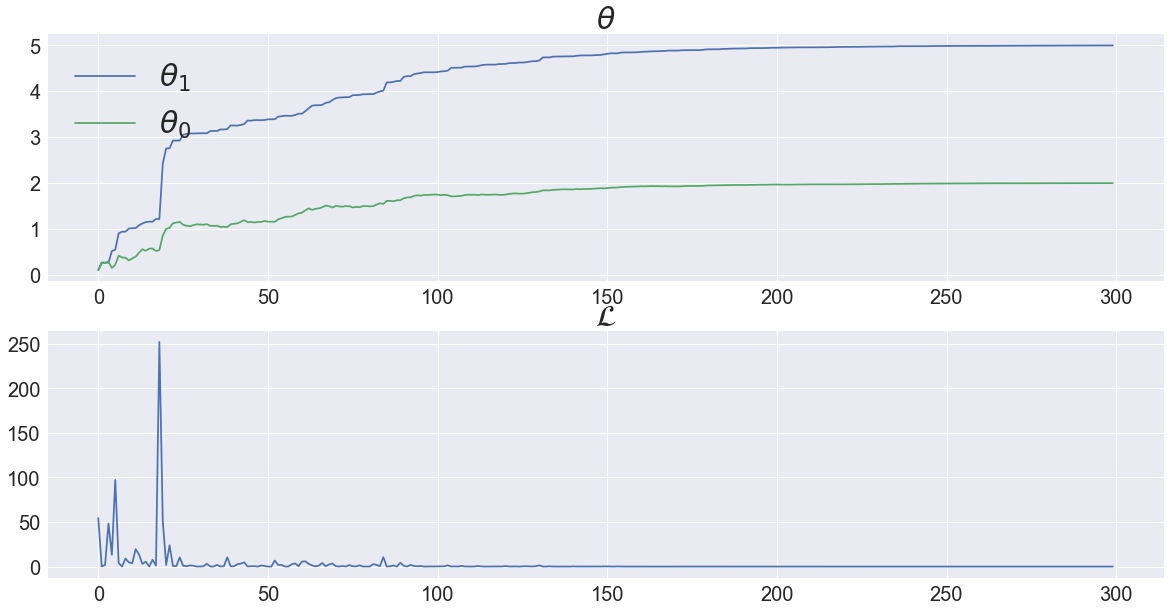

In [45]:
##### Start Your Code(Learning Preparation) #####
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 1
##### End Your Code(Learning Preparation) #####

th1_list, th0_list = [], []
loss_list = []

for epoch in range(epochs):
    for data_sample in dataset:
        x, y = data_sample[1], data_sample[-1]
        
        ##### Start Your Code(Forward Propagation) #####
        pred = th1*x + th0
        loss = np.power(y - pred, 2)
        ##### Start Your Code(Forward Propagation) #####
        
        th1_list.append(th1)
        th0_list.append(th0)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th1 = th1 + 2*x*lr*(y - pred)
        th0 = th0 + 2*lr*(y - pred)
        ##### Start Your Code(Gradient Descent Method) #####
        
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th1_list, label = r'$\theta_{1}$')
ax[0].plot(th0_list, label = r'$\theta_{0}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

***
## Step.4 Predictor Visualization

다음 셀을 실행하여 초기 predictor $\hat{y} = 0.1x + 0.1$가 학습을 거쳐 dataset을 잘 표현하는 predictor로 학습되는지 확인하세요.

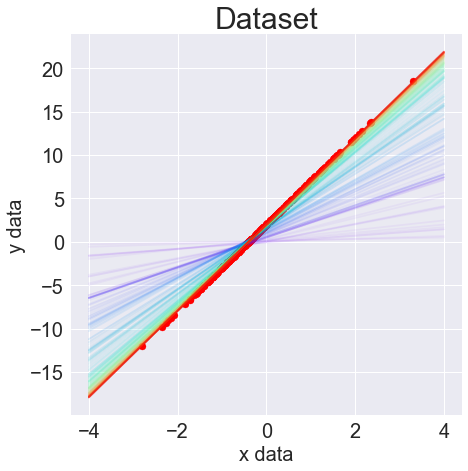

In [39]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dataset[:,1], dataset[:,-1], color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

x_range = np.linspace(-4, 4, 2)
cmap = cm.get_cmap('rainbow', lut = len(th1_list))
for th_idx, (th1,th0) in enumerate(zip(th1_list, th0_list)):
    predictor = th1*x_range + th0
    ax.plot(x_range, predictor,
            color = cmap(th_idx),
            alpha = 0.05)